<a href="https://colab.research.google.com/github/RicardoR002/NLP-CAI2300C/blob/main/Spam_Email_Detection_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 3 Assignment

Spam Email Detection
Use Case: Create a classifier that identifies whether an SMS is spam or legitimate(ham).

In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
url = "https://raw.githubusercontent.com/RicardoR002/NLP-CAI2300C/refs/heads/main/spam_spam.csv"

# I switched to latin-1 encoding after having decoding errors with ISO.
df = pd.read_csv(url, encoding='latin-1')

# Displaying the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
# Check total rows and columns, dimensionality/discrepancy check.
df.shape

(5572, 5)

In [63]:
# Look at original starting info data before cleaning up.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
# We have to drop 3 empty columns that contain no data.
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# We will now rename v1 to label and v2 to message.
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Now we transform the label category into numberical/binary.(word embedding)

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
# Check for any missing or duplicates in data.
df.isnull().sum()

,0
label,0
message,0


In [68]:
df.duplicated().sum()

403

In [69]:
# We found 403 duplicates we must drop now (keep first)
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [70]:
# After cleaning up the data its dimesnions have been reduced.
df.shape

(5169, 2)

In [71]:
# Lets get a visual on the dataset after cleaning/word embedding.
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
# We could see the majority of the data is not spam (ham) compared to the spam results (653)
df['label'].value_counts()

,count
label,
0,4516
1,653


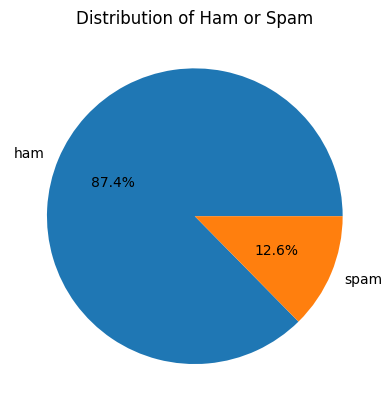

In [73]:
# Data visualization
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Distribution of Ham or Spam')
plt.show()

In [74]:
#  feature engineering (nltk) number of characters, number of words and number of sentences (tokenization)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
df['num_char'] = df['message'].apply(len)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [76]:
df['num_sent'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
# descriptive statistics
df[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
# Information/description for ham (not spam).
df[df['label'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
# Information/description for spam.
df[df['label'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


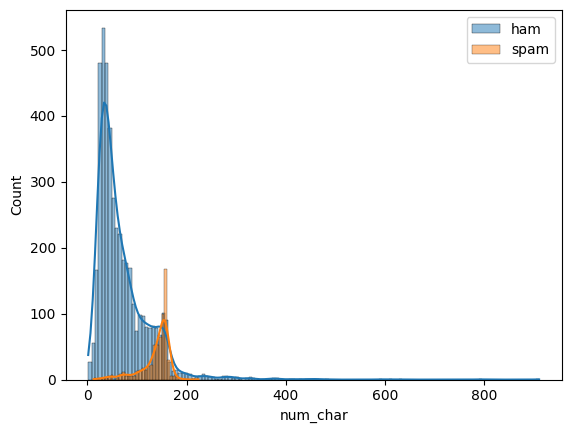

In [80]:
# Data visualization - We see a high concentration of ham (not spam) near the lowerer number of characters.
import seaborn as sns
sns.histplot(df[df['label'] == 0]['num_char'], kde=True, label='ham')
sns.histplot(df[df['label'] == 1]['num_char'], kde=True, label='spam')
plt.legend()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

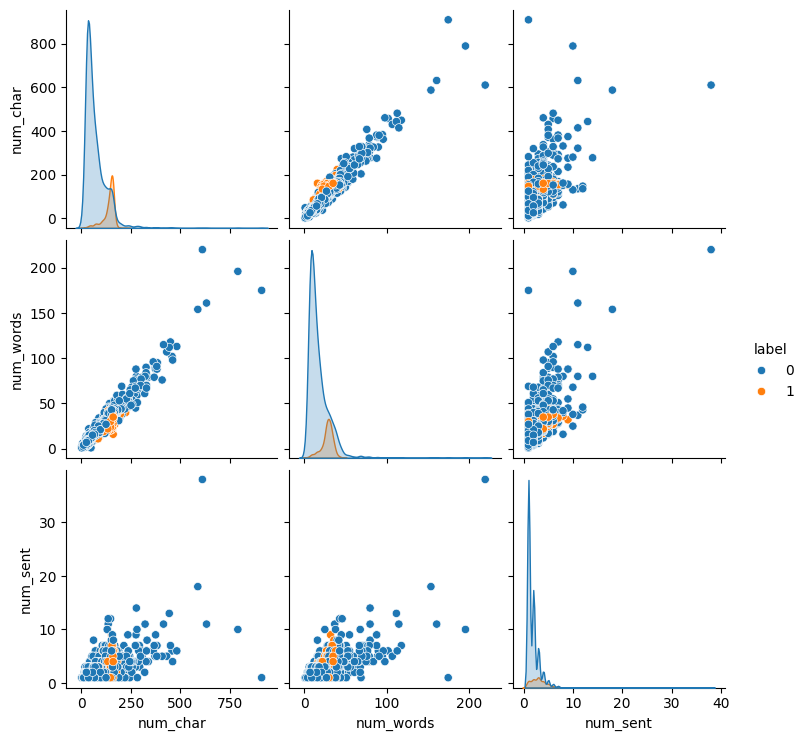

In [81]:
sns.pairplot(df, hue='label')

<Axes: >

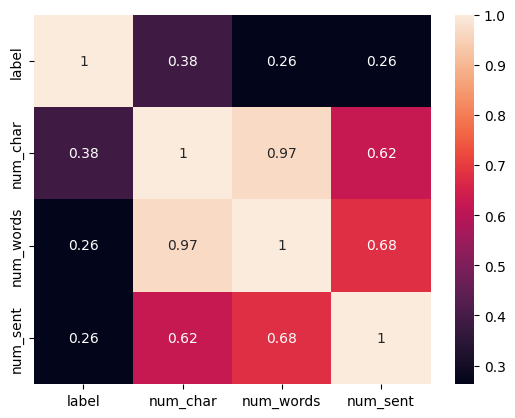

In [82]:
# We see the correlations and patterns in the dataset.
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [83]:
# Initializing the TF-IDF vectorizer, tansforming the text data.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2), stop_words='english')
X = tfidf.fit_transform(df['message'])
y = df['label']

In [84]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions / Evaluation
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.9729206963249516
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.98      0.82      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



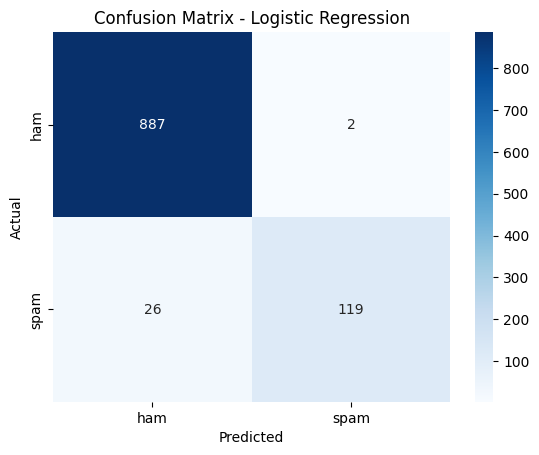

In [86]:
# Generating and plotting the confusion matrix for the Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [87]:
# Perform cross validation on Logistic regression mdoel.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.98065764 0.97678917 0.96518375 0.96324952 0.9729207  0.96324952
 0.95938104 0.96711799 0.97098646 0.97286822]


In [88]:
# Support Vector Machine SVM (This model was the most accurate at 98%)
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions / Evaluation
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Metrics:
Accuracy: 0.9825918762088974
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.96      0.91      0.94       145

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



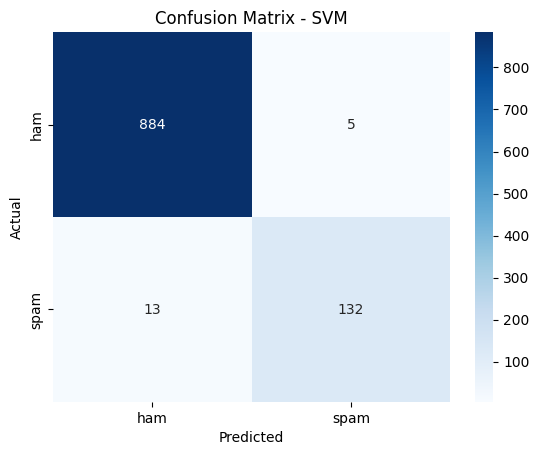

In [89]:
# Generating and plotting the confusion matrix for SVM model.
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [90]:
# Perform cross validation on SVM model.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.98452611 0.97485493 0.9729207  0.97485493 0.97678917 0.97485493
 0.9729207  0.98065764 0.9787234  0.97868217]
Mean CV Score: 0.9769784685049405


In [91]:
# XGBoost
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predictions / Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Metrics:
Accuracy: 0.97678916827853
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.88      0.91       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



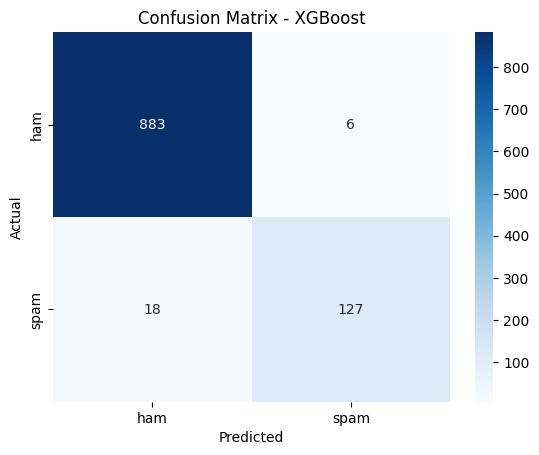

In [92]:
# Generating and plotting the confusion matrix for XGBoost model.
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [93]:
# Perform cross validation on XGBoost model.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.98259188 0.9729207  0.97485493 0.96711799 0.97098646 0.9729207
 0.97485493 0.96905222 0.96905222 0.96705426]


In [94]:
# Here we show our results and model evaluations.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
evaluation_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_xgb)],
    'Recall' : [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_xgb)],
    'F1-Score' : [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_xgb)],
})
evaluation_df.style.background_gradient(cmap='Blues')

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.972921,0.983471,0.820690,0.894737
1,SVM,0.982592,0.963504,0.910345,0.936170
2,XGBoost,0.976789,0.954887,0.875862,0.913669


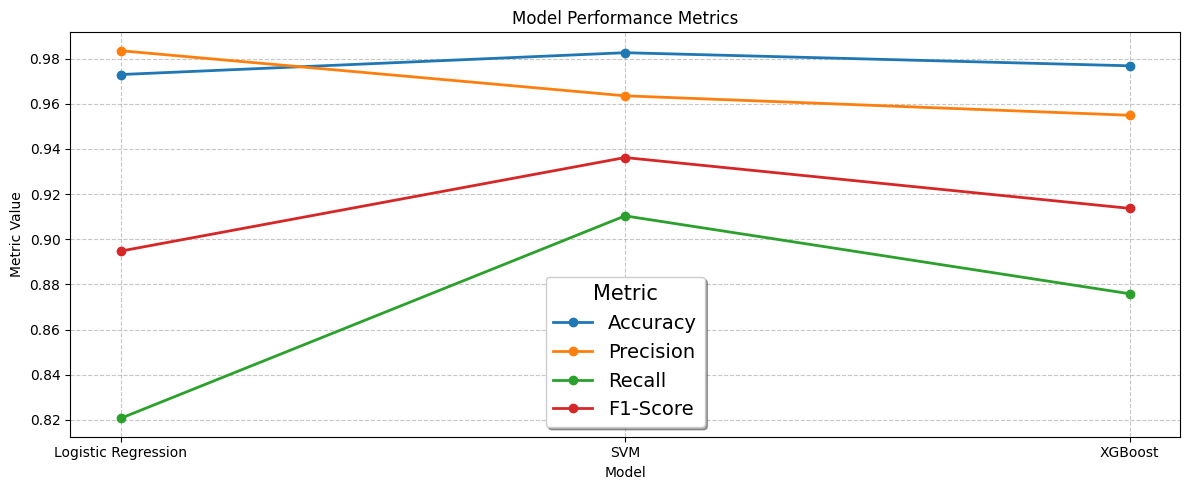

In [95]:
# Plot results to show visual of model performance.
plt.figure(figsize=(12, 5))

for i, metric in enumerate(evaluation_df.columns[1:]):
    plt.plot(evaluation_df['Model'], evaluation_df[metric], marker='o', linestyle='-', linewidth=2, label=metric)

plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metric', title_fontsize='15', fontsize='14', loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()